<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Load the first dataset and check the first two observations

In [5]:
df=pd.read_csv("C:/Users/sai/Desktop/New folder (10)/Day 2/whitewine.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.shape

(4898, 12)

In [4]:
# check data types of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

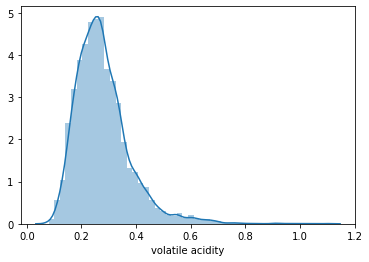

In [142]:
sns.distplot(df['volatile acidity'])
plt.show()

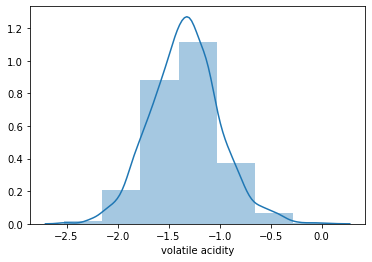

In [145]:
sns.distplot(np.log(df['volatile acidity']),bins=7)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

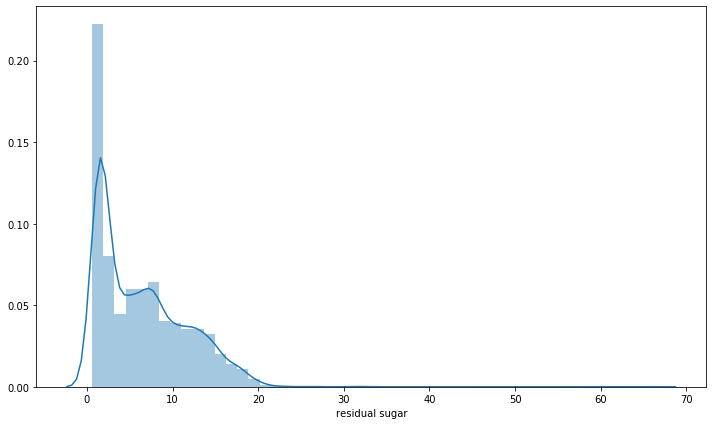

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(df['residual sugar'])
plt.show()

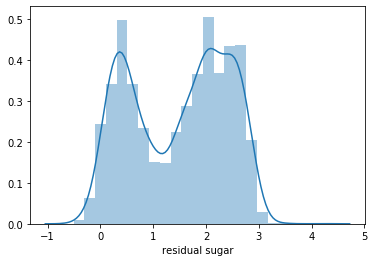

In [17]:
a=np.log(df['residual sugar'])
sns.distplot(a)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

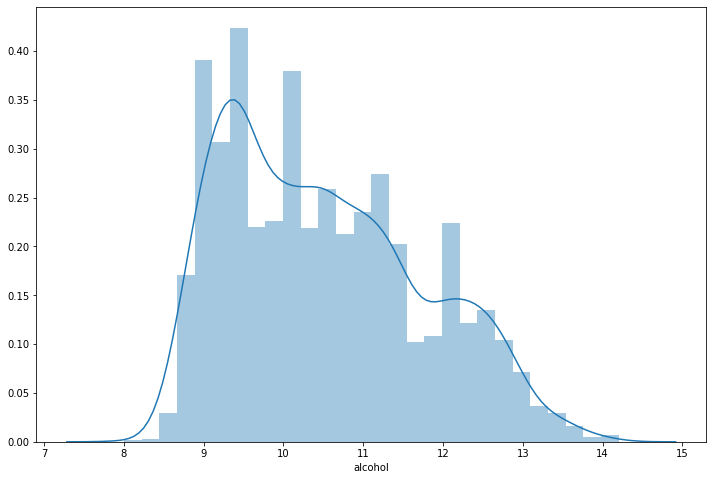

In [147]:
plt.figure(figsize=(12,8))
sns.distplot(df['alcohol'])
plt.show()

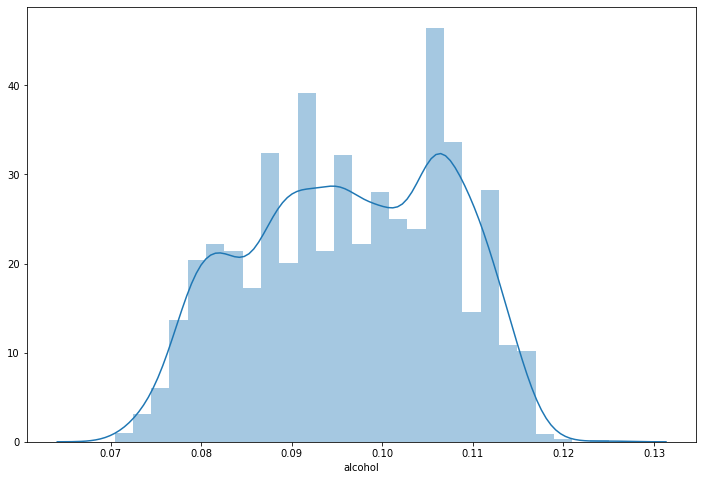

In [150]:
plt.figure(figsize=(12,8))
sns.distplot(np.reciprocal(df['alcohol']))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

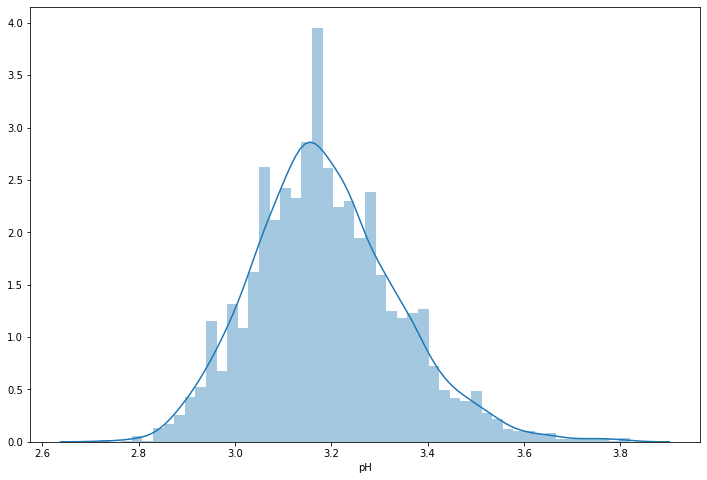

In [152]:
plt.figure(figsize=(12,8))
sns.distplot(df['pH'])
plt.show()

In [154]:
y=df['quality']
x=df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:26:19   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

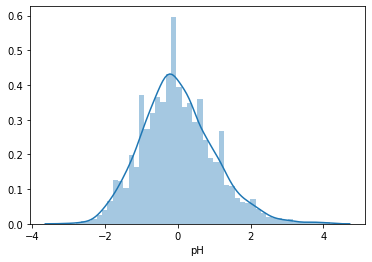

In [159]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['pH'] = ss.fit_transform(pd.DataFrame(df['pH']))

sns.distplot(df['pH'])
plt.show()

In [160]:
y=df['quality']
x=df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:31:44   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# Let's check the multi-collinearity first using vif values.

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_values = [vif(Xc.values, i) for i in range(Xc.shape[1])]

pd.DataFrame(vif_values,index=Xc.columns,columns=['vif'])

,vif
const,3.136297e+06
fixed acidity,2.691435e+00
volatile acidity,1.141156e+00
citric acid,1.165215e+00
residual sugar,1.264406e+01
chlorides,1.236822e+00
free sulfur dioxide,1.787880e+00
total sulfur dioxide,2.239233e+00
density,2.823255e+01
pH,2.196362e+00


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [163]:
y=df['quality']
x=df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:42:16   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking Normality of residuals assumption

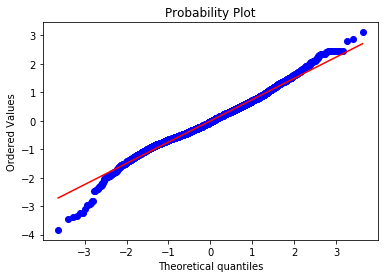

In [165]:
import scipy.stats as stats
stats.probplot(model.resid,plot=plt)
plt.show()

In [166]:
stats.jarque_bera(model.resid)

(251.63681680705625, 0.0)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# build full model before and after transformation and check both the performances.

In [167]:
y=df['quality']
x=df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:46:04   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
# Transforming the citric acid variable and rebuilding the model again.

df['citric acid']=np.sqrt(df['citric acid'])

y=df['quality']
x=df.drop('quality',axis=1)


import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     175.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:51:29   Log-Likelihood:                -5541.0
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.118e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  151.9915     18.772      8.097      0.000     115.190     188.793
fixed acidity            0.0593      0.021      2.835      0.005       0.018       0.100
volatile acidity        -1.7898      0.117    -15.329      0.000      -2.019      -1.561
citric acid              0.3354      0.142      2.365      0.018       0.057       0.613
residual sugar           0.0818      0.008     10.881      0.000       0.067       0.097
chlorides               -0.3648      0.546     -0.668      0.504      -1.435       0.705
free sulfur dioxide      0.0037      0.001      4.420      0.000       0.002       0.005
total sulfur dioxide    -0.0004      0.000     -0.932      0.352      -0.001       0.000
density               -152.2960     19.045     -7.997      0.000    -189.633    -114.959
pH                       0.7034      0.105      6.682      0.000       0.497       0.910
sulphates                0.6234      0.100      6.214      0.000       0.427       0.820
alcohol                  0.1880      0.024      7.757      0.000       0.140       0.235
==============================================================================
Omnibus:                      115.880   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.549
Skew:                           0.076   Prob(JB):                     1.95e-56
Kurtosis:                       4.111   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [187]:
y=df['quality']
x=df.drop('quality',axis=1)

import statsmodels.api as sm
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     175.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:57:36   Log-Likelihood:                -5541.0
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.118e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  151.9915     18.772      8.097      0.000     115.190     188.793
fixed acidity            0.0593      0.021      2.835      0.005       0.018       0.100
volatile acidity        -1.7898      0.117    -15.329      0.000      -2.019      -1.561
citric acid              0.3354      0.142      2.365      0.018       0.057       0.613
residual sugar           0.0818      0.008     10.881      0.000       0.067       0.097
chlorides               -0.3648      0.546     -0.668      0.504      -1.435       0.705
free sulfur dioxide      0.0037      0.001      4.420      0.000       0.002       0.005
total sulfur dioxide    -0.0004      0.000     -0.932      0.352      -0.001       0.000
density               -152.2960     19.045     -7.997      0.000    -189.633    -114.959
pH                       0.7034      0.105      6.682      0.000       0.497       0.910
sulphates                0.6234      0.100      6.214      0.000       0.427       0.820
alcohol                  0.1880      0.024      7.757      0.000       0.140       0.235
==============================================================================
Omnibus:                      115.880   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.549
Skew:                           0.076   Prob(JB):                     1.95e-56
Kurtosis:                       4.111   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
y_pred = model.predict(Xc)
residuals = model.resid

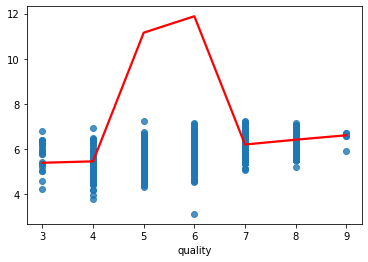

In [190]:
sns.regplot(y,y_pred,lowess=True,line_kws={'color':'r'})
plt.show()

In [181]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model,frac=0.5)

(1.0584050161201117, 0.0803832248249478)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
y=df['quality']
x=df.drop('quality',axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

dd=sfs(lr,k_features=5,forward=True,scoring='r2')
dd.fit(x,y)

print("Top 5 significant variables are:",dd.k_feature_names_)
print("\n")
print("R2-squared score for the model with the 5-variables is:",dd.k_score_)

Top 5 significant variables are: ('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')


R2-squared score for the model with the 5-variables is: 0.24492882616341607


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
y=df['quality']
x=df.drop('quality',axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sfs1 = sfs(lr,k_features=5,forward=False,scoring='r2')
sfs1.fit(x,y)

print("Top 5-significant variables using backward elimination are:",sfs1.k_feature_names_)
print("\n")
print("R2-squared score for the model with the 5-variables is:",sfs1.k_score_)

Top 5-significant variables using backward elimination are: ('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')


R2-squared score for the model with the 5-variables is: 0.24492882616341607


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
y=df['quality']
x=df.drop('quality',axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sfs1 = sfs(lr,k_features=(2,6),forward=True,scoring='r2')
sfs1.fit(x,y)

print("Best 2-6 significant variables are:",sfs1.k_feature_names_,"\n")
print("r-square for the model with 2-6 best features is:",sfs1.k_score_)

Best 2-6 significant variables are: ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'alcohol') 

r-square for the model with 2-6 best features is: 0.24672544391307402


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
y=df['quality']
x=df.drop('quality',axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sfs1 = sfs(lr,k_features='best',forward=True,scoring='r2')
sfs1.fit(x,y)

print("Best set of significant variables are:",sfs1.k_feature_names_,"\n")
print("r-square for the model with best features:",sfs1.k_score_)

Best set of significant variables are: ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol') 

r-square for the model with best features: 0.2470659833397705


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
y=df['quality']
x=df.drop('quality',axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sfs1 = sfs(lr,k_features='best',forward=False,scoring='r2')
sfs1.fit(x,y)

print("Best set of significant variables using backward elimination are:",sfs1.k_feature_names_,"\n")
print("r-square for the model with best features:",sfs1.k_score_)

Best set of significant variables using backward elimination are: ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol') 

r-square for the model with best features: 0.2470659833397705


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
y=df['quality']
x=df.drop('quality',axis=1)

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test =  train_test_split(x,y,shuffle=True,random_state=42)

lr = LinearRegression()
rfe=RFE(lr)
kfold = KFold(n_splits=3,shuffle=True, random_state=42)
param = [{'n_features_to_select':list(range(1,x.shape[1]+1))}]

gsearch = GridSearchCV(rfe,param_grid=param,cv=kfold,scoring='r2')
gsearch.fit(x,y)

print("The best set of significant variables are",gsearch.best_params_)

The best set of significant variables are {'n_features_to_select': 11}


In [102]:
# we got the best set of variables as 11. So, we will rebuild thee regression model using rfe again.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test =  train_test_split(x,y)

lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=11)  # we can take any number of features here.

rfe.fit(x_train,y_train)

y_pred_test = rfe.predict(x_test)

a=pd.DataFrame(rfe.ranking_,index=x.columns,columns=['rank']).sort_values(by='rank')

print("best set of significant variables are:",list(a[a['rank']==1].index))
print("\n")
print("r-square value for thee model is:",r2_score(y_test,y_pred_test))

best set of significant variables are: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


r-square value for thee model is: 0.24150637428186805


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
y=df['quality']
x=df[['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']]

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

r_square_train = r2_score(y_train, y_train_pred)
r_square_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r-square of train set:",r_square_train,"r-square of test set:",r_square_test)
print("\n")
print("rmse of train set:",rmse_train,"rmse of test set:",rmse_test)

r-square of train set: 0.2686157101635973 r-square of test set: 0.2766940217993512


rmse of train set: 0.7584329465997828 rmse of test set: 0.7493535738804956


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# ph = 7 ---> neutral
# ph > 7 ---> basic
# ph < 7 ---> acidic 

In [117]:
new_column=[]
for i in df['pH'].values:
    if i==7:
        new_column.append('neutral')
    elif i<7:
        new_column.append('acidic')
    else:
        new_column.append('basic')
df['Wine_column']=new_column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine_column
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,acidic
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,acidic
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,acidic
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,acidic
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,acidic


In [118]:
df['Wine_column'].value_counts()

acidic    4898
Name: Wine_column, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
y=df['quality']
x=df.drop('quality',axis=1)

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

cvscore=cross_val_score(lr,x_train,y_train,cv=10,scoring='r2')
cvscore

array([0.27615344, 0.32007146, 0.21316305, 0.30741975, 0.31448698,
       0.23366994, 0.33316265, 0.31131696, 0.16629135, 0.27397265])

In [135]:
print("overall r-square of the model is: ",np.mean(cv))

overall r-square of the model is:  0.27497082209667634


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [137]:
y=df['quality']
x=df.drop('quality',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

lr=LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cvs = cross_val_score(lr,x_train,y_train,cv=kfold,scoring='r2')
cvs

array([0.25886142, 0.28206463, 0.23482787, 0.29236026, 0.3070732 ])

In [32]:
print("overall r-square of the model is: ",np.mean(cv))

overall r-square of the model is:  0.27683320263074296


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [138]:
y=df['quality']
x=df.drop('quality',axis=1)

from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

loocv=LeaveOneOut()
cv=cross_val_score(lr,x_train,y_train,cv=loocv,scoring='neg_mean_squared_error')
cv

array([-0.17088254, -1.18919249, -0.00490821, ..., -0.0132426 ,
       -0.06909864, -4.43530345])

In [139]:
print("overall rmse of the model is: ",np.sqrt(cv*-1).mean())

overall rmse of the model is:  0.5880705471456641
